In [1]:
# Import packages
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from shapely.geometry import Point
from shapely.geometry import shape
import os
import seaborn as sns
from scipy import stats
import random

## Capital Bikeshare Trip Data

In [2]:
## ================================================== Station_Hour_BART_Data_Start ===========================================##

In [3]:
mother_dir = 'Data/Bikeshare/'
file_list = os.listdir(mother_dir)
ridership_data_agg = pd.read_csv(mother_dir + file_list[0])
for i in np.arange(1, len(file_list)):
    ridership_data = pd.read_csv(mother_dir + file_list[i])
    ridership_data_agg = pd.concat([ridership_data_agg, ridership_data], ignore_index=True)
ridership_data_agg.head()    

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,1B4445D591115BD9,classic_bike,2022-01-06 18:39:28,2022-01-06 18:43:03,Monroe Ave & Leslie Ave,31087.0,Potomac Ave & Main Line Blvd,31910.0,38.820932,-77.053096,38.822738,-77.049265,member
1,7F4A0E2F03EADEB7,classic_bike,2022-01-31 19:21:22,2022-01-31 19:27:33,14th & L St NW,31283.0,10th & G St NW,31274.0,38.903658,-77.031737,38.898243,-77.026235,member
2,30DD8A84164843AD,classic_bike,2022-01-07 15:28:39,2022-01-07 15:31:01,14th & L St NW,31283.0,12th & L St NW,31251.0,38.903658,-77.031737,38.903819,-77.028400,member
3,FC67665D7682D0A6,classic_bike,2022-01-27 20:09:25,2022-01-27 20:37:02,New York Ave & Hecht Ave NE,31518.0,Nannie Helen Burroughs & Minnesota Ave NE,31704.0,38.915604,-76.983683,38.901385,-76.941877,casual
4,7854F7CC4F631A1E,classic_bike,2022-01-07 16:14:28,2022-01-07 16:16:13,Falls Church City Hall / Park Ave & Little Fal...,32608.0,Pennsylvania Ave & Park Ave,32603.0,38.885434,-77.173605,38.887403,-77.176992,member


In [4]:
## remove trip data whose station_id = 0
ridership_data_agg.start_station_id = ridership_data_agg.start_station_id.fillna(0.0)
ridership_data_agg.end_station_id = ridership_data_agg.end_station_id.fillna(0.0)
ridership_data_agg = ridership_data_agg.loc[(ridership_data_agg['start_station_id'] != 0) & (ridership_data_agg['end_station_id'] != 0)]
ridership_data_agg.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,1B4445D591115BD9,classic_bike,2022-01-06 18:39:28,2022-01-06 18:43:03,Monroe Ave & Leslie Ave,31087.0,Potomac Ave & Main Line Blvd,31910.0,38.820932,-77.053096,38.822738,-77.049265,member
1,7F4A0E2F03EADEB7,classic_bike,2022-01-31 19:21:22,2022-01-31 19:27:33,14th & L St NW,31283.0,10th & G St NW,31274.0,38.903658,-77.031737,38.898243,-77.026235,member
2,30DD8A84164843AD,classic_bike,2022-01-07 15:28:39,2022-01-07 15:31:01,14th & L St NW,31283.0,12th & L St NW,31251.0,38.903658,-77.031737,38.903819,-77.028400,member
3,FC67665D7682D0A6,classic_bike,2022-01-27 20:09:25,2022-01-27 20:37:02,New York Ave & Hecht Ave NE,31518.0,Nannie Helen Burroughs & Minnesota Ave NE,31704.0,38.915604,-76.983683,38.901385,-76.941877,casual
4,7854F7CC4F631A1E,classic_bike,2022-01-07 16:14:28,2022-01-07 16:16:13,Falls Church City Hall / Park Ave & Little Fal...,32608.0,Pennsylvania Ave & Park Ave,32603.0,38.885434,-77.173605,38.887403,-77.176992,member


In [5]:
## riderable_type: electric_bike (2), classic_bike(1), docked_bike(0)
ridership_data_agg['rideable_type'] = ridership_data_agg['rideable_type'].replace('classic_bike', 2)
ridership_data_agg['rideable_type'] = ridership_data_agg['rideable_type'].replace('docked_bike', 1)
ridership_data_agg['rideable_type'] = ridership_data_agg['rideable_type'].replace('electric_bike', 0)

## member_casual: member (1), casual(0)
ridership_data_agg['member_casual'] = ridership_data_agg['member_casual'].replace('member', 1)
ridership_data_agg['member_casual'] = ridership_data_agg['member_casual'].replace('casual', 0)


# remove station_name
del ridership_data_agg['start_station_name']
del ridership_data_agg['end_station_name']

ridership_data_agg.head()

,ride_id,rideable_type,started_at,ended_at,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,1B4445D591115BD9,2,2022-01-06 18:39:28,2022-01-06 18:43:03,31087.0,31910.0,38.820932,-77.053096,38.822738,-77.049265,1
1,7F4A0E2F03EADEB7,2,2022-01-31 19:21:22,2022-01-31 19:27:33,31283.0,31274.0,38.903658,-77.031737,38.898243,-77.026235,1
2,30DD8A84164843AD,2,2022-01-07 15:28:39,2022-01-07 15:31:01,31283.0,31251.0,38.903658,-77.031737,38.903819,-77.028400,1
3,FC67665D7682D0A6,2,2022-01-27 20:09:25,2022-01-27 20:37:02,31518.0,31704.0,38.915604,-76.983683,38.901385,-76.941877,0
4,7854F7CC4F631A1E,2,2022-01-07 16:14:28,2022-01-07 16:16:13,32608.0,32603.0,38.885434,-77.173605,38.887403,-77.176992,1


In [6]:
## Calculate travel time (min) at a station level
ridership_data_agg['duration'] = pd.to_datetime(ridership_data_agg['ended_at']) - pd.to_datetime(ridership_data_agg['started_at'])
ridership_data_agg['duration'] = ridership_data_agg['duration'].dt.total_seconds()/60
ridership_data_agg.head()

,ride_id,rideable_type,started_at,ended_at,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,1B4445D591115BD9,2,2022-01-06 18:39:28,2022-01-06 18:43:03,31087.0,31910.0,38.820932,-77.053096,38.822738,-77.049265,1,3.583333
1,7F4A0E2F03EADEB7,2,2022-01-31 19:21:22,2022-01-31 19:27:33,31283.0,31274.0,38.903658,-77.031737,38.898243,-77.026235,1,6.183333
2,30DD8A84164843AD,2,2022-01-07 15:28:39,2022-01-07 15:31:01,31283.0,31251.0,38.903658,-77.031737,38.903819,-77.028400,1,2.366667
3,FC67665D7682D0A6,2,2022-01-27 20:09:25,2022-01-27 20:37:02,31518.0,31704.0,38.915604,-76.983683,38.901385,-76.941877,0,27.616667
4,7854F7CC4F631A1E,2,2022-01-07 16:14:28,2022-01-07 16:16:13,32608.0,32603.0,38.885434,-77.173605,38.887403,-77.176992,1,1.750000


In [7]:
## add a new attribute: geometry
ridership_data_agg['o_geometry'] = ridership_data_agg[['start_lng', 'start_lat']].values.tolist()
ridership_data_agg['o_geometry'] = ridership_data_agg['o_geometry'].apply(Point)
ridership_data_agg['d_geometry'] = ridership_data_agg[['end_lng', 'end_lat']].values.tolist()
ridership_data_agg['d_geometry'] = ridership_data_agg['d_geometry'].apply(Point)

## select unique station info
# add lat and lon info for station
station_lat = gpd.GeoDataFrame(ridership_data_agg.groupby('start_station_id').start_lat.mean()).reset_index()
station_lon = gpd.GeoDataFrame(ridership_data_agg.groupby('start_station_id').start_lng.mean()).reset_index()
station_info = station_lat.merge(station_lon, how = 'left', on = 'start_station_id')
station_info['geometry'] = station_info[['start_lng', 'start_lat']].values.tolist()
station_info['geometry'] = station_info['geometry'].apply(Point)

## remove those OD not in Washington DC
DC_boundary = gpd.read_file('Data/Shapefile/Washington_DC_Boundary.geojson')
DC_station_index = []
for i in range (len(station_info)):
    if station_info.geometry[i].within(DC_boundary.geometry[0]):
        DC_station_index.append(i)
station_info = station_info.loc[DC_station_index]

ridership_data_agg = ridership_data_agg[ridership_data_agg['start_station_id'].isin(station_info.start_station_id.unique())]
ridership_data_agg = ridership_data_agg[ridership_data_agg['end_station_id'].isin(station_info.start_station_id.unique())]

ridership_data_agg.head()

,ride_id,rideable_type,started_at,ended_at,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,o_geometry,d_geometry
1,7F4A0E2F03EADEB7,2,2022-01-31 19:21:22,2022-01-31 19:27:33,31283.0,31274.0,38.903658,-77.031737,38.898243,-77.026235,1,6.183333,POINT (-77.031737 38.903658),POINT (-77.02623546123505 38.89824328774852)
2,30DD8A84164843AD,2,2022-01-07 15:28:39,2022-01-07 15:31:01,31283.0,31251.0,38.903658,-77.031737,38.903819,-77.028400,1,2.366667,POINT (-77.031737 38.903658),POINT (-77.0284 38.903819)
3,FC67665D7682D0A6,2,2022-01-27 20:09:25,2022-01-27 20:37:02,31518.0,31704.0,38.915604,-76.983683,38.901385,-76.941877,0,27.616667,POINT (-76.983683 38.915604),POINT (-76.941877 38.901385)
5,FBDCB4296C2A0B2E,2,2022-01-24 19:50:35,2022-01-24 20:07:00,31283.0,31602.0,38.903658,-77.031737,38.930800,-77.031500,0,16.416667,POINT (-77.031737 38.903658),POINT (-77.0315 38.9308)
6,6B14178CB767703A,2,2022-01-26 19:37:48,2022-01-26 19:48:50,31104.0,31118.0,38.922925,-77.042581,38.917622,-77.015970,0,11.033333,POINT (-77.042581 38.922925),POINT (-77.01597 38.917622)


In [8]:
## compute travel distance
origin_geo = gpd.GeoDataFrame({'geometry': ridership_data_agg.o_geometry}, crs='EPSG:4326').to_crs('EPSG:5234')
destination_geo = gpd.GeoDataFrame({'geometry': ridership_data_agg.d_geometry}, crs='EPSG:4326').to_crs('EPSG:5234')
ridership_data_agg['distance'] = origin_geo.distance(destination_geo)*0.6214/1000
ridership_data_agg.head()

,ride_id,rideable_type,started_at,ended_at,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,o_geometry,d_geometry,distance
1,7F4A0E2F03EADEB7,2,2022-01-31 19:21:22,2022-01-31 19:27:33,31283.0,31274.0,38.903658,-77.031737,38.898243,-77.026235,1,6.183333,POINT (-77.031737 38.903658),POINT (-77.02623546123505 38.89824328774852),0.498940
2,30DD8A84164843AD,2,2022-01-07 15:28:39,2022-01-07 15:31:01,31283.0,31251.0,38.903658,-77.031737,38.903819,-77.028400,1,2.366667,POINT (-77.031737 38.903658),POINT (-77.0284 38.903819),0.188527
3,FC67665D7682D0A6,2,2022-01-27 20:09:25,2022-01-27 20:37:02,31518.0,31704.0,38.915604,-76.983683,38.901385,-76.941877,0,27.616667,POINT (-76.983683 38.915604),POINT (-76.941877 38.901385),2.571572
5,FBDCB4296C2A0B2E,2,2022-01-24 19:50:35,2022-01-24 20:07:00,31283.0,31602.0,38.903658,-77.031737,38.930800,-77.031500,0,16.416667,POINT (-77.031737 38.903658),POINT (-77.0315 38.9308),1.958720
6,6B14178CB767703A,2,2022-01-26 19:37:48,2022-01-26 19:48:50,31104.0,31118.0,38.922925,-77.042581,38.917622,-77.015970,0,11.033333,POINT (-77.042581 38.922925),POINT (-77.01597 38.917622),1.548224


In [9]:
## data selection/filtering based on travel duration
ridership_data_agg = ridership_data_agg.loc[(ridership_data_agg['duration'] >= 0) & (ridership_data_agg['duration'] <= 240)]
ridership_data_agg.head()

,ride_id,rideable_type,started_at,ended_at,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,o_geometry,d_geometry,distance
1,7F4A0E2F03EADEB7,2,2022-01-31 19:21:22,2022-01-31 19:27:33,31283.0,31274.0,38.903658,-77.031737,38.898243,-77.026235,1,6.183333,POINT (-77.031737 38.903658),POINT (-77.02623546123505 38.89824328774852),0.498940
2,30DD8A84164843AD,2,2022-01-07 15:28:39,2022-01-07 15:31:01,31283.0,31251.0,38.903658,-77.031737,38.903819,-77.028400,1,2.366667,POINT (-77.031737 38.903658),POINT (-77.0284 38.903819),0.188527
3,FC67665D7682D0A6,2,2022-01-27 20:09:25,2022-01-27 20:37:02,31518.0,31704.0,38.915604,-76.983683,38.901385,-76.941877,0,27.616667,POINT (-76.983683 38.915604),POINT (-76.941877 38.901385),2.571572
5,FBDCB4296C2A0B2E,2,2022-01-24 19:50:35,2022-01-24 20:07:00,31283.0,31602.0,38.903658,-77.031737,38.930800,-77.031500,0,16.416667,POINT (-77.031737 38.903658),POINT (-77.0315 38.9308),1.958720
6,6B14178CB767703A,2,2022-01-26 19:37:48,2022-01-26 19:48:50,31104.0,31118.0,38.922925,-77.042581,38.917622,-77.015970,0,11.033333,POINT (-77.042581 38.922925),POINT (-77.01597 38.917622),1.548224


In [10]:
## add hour and day
ridership_data_agg['o_month'] = pd.to_datetime(ridership_data_agg.started_at).dt.month
ridership_data_agg['o_day'] = pd.to_datetime(ridership_data_agg.started_at).dt.day
ridership_data_agg['o_hour'] = pd.to_datetime(ridership_data_agg.started_at).dt.hour

ridership_data_agg['d_month'] = pd.to_datetime(ridership_data_agg.ended_at).dt.month
ridership_data_agg['d_day'] = pd.to_datetime(ridership_data_agg.ended_at).dt.day
ridership_data_agg['d_hour'] = pd.to_datetime(ridership_data_agg.ended_at).dt.hour

ridership_data_agg.head()

,ride_id,rideable_type,started_at,ended_at,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,...,duration,o_geometry,d_geometry,distance,o_month,o_day,o_hour,d_month,d_day,d_hour
1,7F4A0E2F03EADEB7,2,2022-01-31 19:21:22,2022-01-31 19:27:33,31283.0,31274.0,38.903658,-77.031737,38.898243,-77.026235,...,6.183333,POINT (-77.031737 38.903658),POINT (-77.02623546123505 38.89824328774852),0.498940,1,31,19,1,31,19
2,30DD8A84164843AD,2,2022-01-07 15:28:39,2022-01-07 15:31:01,31283.0,31251.0,38.903658,-77.031737,38.903819,-77.028400,...,2.366667,POINT (-77.031737 38.903658),POINT (-77.0284 38.903819),0.188527,1,7,15,1,7,15
3,FC67665D7682D0A6,2,2022-01-27 20:09:25,2022-01-27 20:37:02,31518.0,31704.0,38.915604,-76.983683,38.901385,-76.941877,...,27.616667,POINT (-76.983683 38.915604),POINT (-76.941877 38.901385),2.571572,1,27,20,1,27,20
5,FBDCB4296C2A0B2E,2,2022-01-24 19:50:35,2022-01-24 20:07:00,31283.0,31602.0,38.903658,-77.031737,38.930800,-77.031500,...,16.416667,POINT (-77.031737 38.903658),POINT (-77.0315 38.9308),1.958720,1,24,19,1,24,20
6,6B14178CB767703A,2,2022-01-26 19:37:48,2022-01-26 19:48:50,31104.0,31118.0,38.922925,-77.042581,38.917622,-77.015970,...,11.033333,POINT (-77.042581 38.922925),POINT (-77.01597 38.917622),1.548224,1,26,19,1,26,19


## Trip Duration and Distance

In [11]:
## ====================================================== Visualization ============================================== ##

D:\Software\Anaconda\Install\envs\gpd_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Probability density')

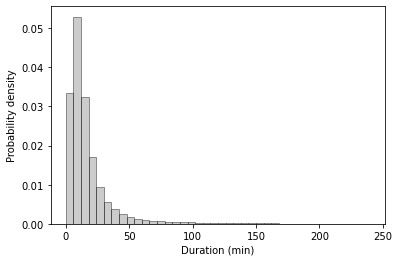

In [12]:
## travel time distribution
sns.distplot(a=ridership_data_agg['duration'], kde = False, bins=40, norm_hist = True, color='grey',
             hist_kws={"edgecolor": 'black'})
plt.xlabel('Duration (min)')
plt.ylabel('Probability density')

In [13]:
np.mean(ridership_data_agg['duration'])

17.640123468608255

Text(0, 0.5, 'Probability density')

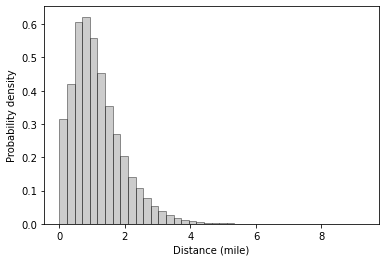

In [14]:
## travel distance distribution
sns.distplot(a=ridership_data_agg['distance'], kde = False, bins=40, norm_hist = True, color='grey',
             hist_kws={"edgecolor": 'black'})
plt.xlabel('Distance (mile)')
plt.ylabel('Probability density')

In [15]:
np.mean(ridership_data_agg['distance'])

1.1533737490909284

## Ridership Data Aggregation

In [16]:
## start_station_hour (hourly ridership integration)
station_hour_data_start = pd.DataFrame(ridership_data_agg.groupby(['start_station_id', 'o_month', 'o_day', 'o_hour'])['duration', 'distance'].mean()).reset_index()
station_hour_ridership_start = pd.DataFrame(ridership_data_agg[['start_station_id', 'o_month', 'o_day', 'o_hour']].value_counts()).reset_index()
station_hour_data_start['o_ridership'] = station_hour_ridership_start.iloc[:,[4]]
station_hour_data_start = station_hour_data_start.merge(station_info, how='left', on='start_station_id')
station_hour_data_start = station_hour_data_start.rename(columns={'o_month': 'month', 'o_day': 'day', 'o_hour': 'hour'})
print(len(station_hour_data_start))
station_hour_data_start.head()

C:\Users\Kaifa Lu\AppData\Local\Temp\ipykernel_12732\2518846400.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  station_hour_data_start = pd.DataFrame(ridership_data_agg.groupby(['start_station_id', 'o_month', 'o_day', 'o_hour'])['duration', 'distance'].mean()).reset_index()


1060128


,start_station_id,month,day,hour,duration,distance,o_ridership,start_lat,start_lng,geometry
0,31100.0,1,1,2,17.191667,0.648845,55,38.900286,-77.042904,POINT (-77.0429040718798 38.90028623615617)
1,31100.0,1,1,15,20.150000,0.567409,54,38.900286,-77.042904,POINT (-77.0429040718798 38.90028623615617)
2,31100.0,1,2,13,3.700000,0.081136,52,38.900286,-77.042904,POINT (-77.0429040718798 38.90028623615617)
3,31100.0,1,2,14,78.810000,0.158719,48,38.900286,-77.042904,POINT (-77.0429040718798 38.90028623615617)
4,31100.0,1,2,18,21.450000,2.033496,48,38.900286,-77.042904,POINT (-77.0429040718798 38.90028623615617)


In [17]:
## end_station_hour
station_hour_data_end = pd.DataFrame(ridership_data_agg.groupby(['end_station_id', 'd_month', 'd_day', 'd_hour'])['duration', 'distance'].mean()).reset_index()
station_hour_ridership_end = pd.DataFrame(ridership_data_agg[['end_station_id', 'd_month', 'd_day', 'd_hour']].value_counts()).reset_index()
station_hour_data_end['d_ridership'] = station_hour_ridership_end.iloc[:,[4]]
station_hour_data_end = station_hour_data_end.rename(columns={'end_station_id': 'start_station_id', 'd_month': 'month', 'd_day': 'day', 'd_hour': 'hour'})
station_hour_data_end = station_hour_data_end.merge(station_info, how='left', on='start_station_id')
print(len(station_hour_data_end))
station_hour_data_end.head()

C:\Users\Kaifa Lu\AppData\Local\Temp\ipykernel_12732\3153303022.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  station_hour_data_end = pd.DataFrame(ridership_data_agg.groupby(['end_station_id', 'd_month', 'd_day', 'd_hour'])['duration', 'distance'].mean()).reset_index()


1055035


,start_station_id,month,day,hour,duration,distance,d_ridership,start_lat,start_lng,geometry
0,31100.0,1,1,15,9.716667,0.473266,63,38.900286,-77.042904,POINT (-77.0429040718798 38.90028623615617)
1,31100.0,1,1,16,27.041667,0.230419,58,38.900286,-77.042904,POINT (-77.0429040718798 38.90028623615617)
2,31100.0,1,1,17,20.675000,1.107542,53,38.900286,-77.042904,POINT (-77.0429040718798 38.90028623615617)
3,31100.0,1,2,11,8.450000,0.893078,51,38.900286,-77.042904,POINT (-77.0429040718798 38.90028623615617)
4,31100.0,1,2,13,9.100000,1.130825,49,38.900286,-77.042904,POINT (-77.0429040718798 38.90028623615617)


In [18]:
# full hour data set (cover each hour and station)

# start
station_info_start = pd.DataFrame(station_hour_data_start.groupby('start_station_id')['start_lat', 'start_lng'].mean()).reset_index()
station_full_data_start = pd.concat([station_info_start]*365*24, ignore_index=True)
station_full_data_start['day'] = np.array(station_full_data_start.index/(len(station_info_start)*24)).astype(int) + 1
station_full_data_start['hour'] = (np.array(station_full_data_start.index/len(station_info_start)).astype(int))%24

month_day_index = np.arange(1,13)
month_day_count = np.array([0,31,59,90,120,151,181,212,243,273,304,334,365])
month_day = month_day_count*len(station_info_start)*24
station_full_data_start['month'] = station_full_data_start['day']
for i in np.arange(len(month_day_index)):
    station_full_data_start['month'].loc[(station_full_data_start.index >= month_day[i]) & (station_full_data_start.index < month_day[i+1])] = month_day_index[i]
    station_full_data_start['day'].loc[station_full_data_start['month'] == month_day_index[i]] = station_full_data_start['day'].loc[station_full_data_start['month'] == month_day_index[i]] - month_day_count[i]

#station_full_data_start['day'] = station_full_data_start['day'] - month_day[station_full_data_start['month'] - 1]
station_full_data_start = station_full_data_start.merge(station_hour_data_start[['start_station_id','month','day','hour','duration','distance','o_ridership']], how='left',on=['start_station_id','month','day','hour'])
station_full_data_start = station_full_data_start.fillna(0)
station_full_data_start.head()

C:\Users\Kaifa Lu\AppData\Local\Temp\ipykernel_12732\1491690622.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  station_info_start = pd.DataFrame(station_hour_data_start.groupby('start_station_id')['start_lat', 'start_lng'].mean()).reset_index()
C:\Users\Kaifa Lu\AppData\Local\Temp\ipykernel_12732\1491690622.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_full_data_start['month'].loc[(station_full_data_start.index >= month_day[i]) & (station_full_data_start.index < month_day[i+1])] = month_day_index[i]
C:\Users\Kaifa Lu\AppData\Local\Temp\ipykernel_12732\1491690622.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:

,start_station_id,start_lat,start_lng,day,hour,month,duration,distance,o_ridership
0,31100.0,38.900286,-77.042904,1,0,1,0.000000,0.000000,0.0
1,31101.0,38.917768,-77.032078,1,0,1,8.783333,1.160535,18.0
2,31102.0,38.929465,-77.027822,1,0,1,0.000000,0.000000,0.0
3,31103.0,38.926122,-77.035430,1,0,1,0.000000,0.000000,0.0
4,31104.0,38.922891,-77.042537,1,0,1,0.000000,0.000000,0.0


In [19]:
# full data set

# end
station_info_end = pd.DataFrame(station_hour_data_end.groupby('start_station_id')['start_lat', 'start_lng'].mean()).reset_index()
station_full_data_end = pd.concat([station_info_end]*365*24, ignore_index=True)
station_full_data_end['day'] = np.array(station_full_data_end.index/(len(station_info_end)*24)).astype(int) + 1
station_full_data_end['hour'] = (np.array(station_full_data_end.index/len(station_info_end)).astype(int))%24

month_day_index = np.arange(1,13)
month_day_count = np.array([0,31,59,90,120,151,181,212,243,273,304,334,365])
month_day = month_day_count*len(station_info_end)*24
station_full_data_end['month'] = station_full_data_end['day']
for i in np.arange(len(month_day_index)):
    station_full_data_end['month'].loc[(station_full_data_end.index >= month_day[i]) & (station_full_data_end.index < month_day[i+1])] = month_day_index[i]
    station_full_data_end['day'].loc[station_full_data_end['month'] == month_day_index[i]] = station_full_data_end['day'].loc[station_full_data_end['month'] == month_day_index[i]] - month_day_count[i]

#station_full_data_end['day'] = station_full_data_end['day'] - month_day[station_full_data_end['month'] - 1]
station_full_data_end = station_full_data_end.merge(station_hour_data_end[['start_station_id','month','day','hour','duration','distance','d_ridership']], how='left',on=['start_station_id','month','day','hour'])
station_full_data_end = station_full_data_end.fillna(0)
station_full_data_end.head()

C:\Users\Kaifa Lu\AppData\Local\Temp\ipykernel_12732\2881110001.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  station_info_end = pd.DataFrame(station_hour_data_end.groupby('start_station_id')['start_lat', 'start_lng'].mean()).reset_index()
C:\Users\Kaifa Lu\AppData\Local\Temp\ipykernel_12732\2881110001.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_full_data_end['month'].loc[(station_full_data_end.index >= month_day[i]) & (station_full_data_end.index < month_day[i+1])] = month_day_index[i]
C:\Users\Kaifa Lu\AppData\Local\Temp\ipykernel_12732\2881110001.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.p

,start_station_id,start_lat,start_lng,day,hour,month,duration,distance,d_ridership
0,31100.0,38.900286,-77.042904,1,0,1,0.000000,0.000000,0.0
1,31101.0,38.917768,-77.032078,1,0,1,6.283333,1.027772,18.0
2,31102.0,38.929465,-77.027822,1,0,1,0.000000,0.000000,0.0
3,31103.0,38.926122,-77.035430,1,0,1,0.000000,0.000000,0.0
4,31104.0,38.922891,-77.042537,1,0,1,10.216667,1.009929,12.0


In [20]:
# full data set

# imbalance
station_full_data_imbalance = station_full_data_start[['start_station_id', 'start_lat', 'start_lng', 'month', 'day', 'hour', 'duration', 'distance', 'o_ridership']]
station_full_data_imbalance['d_ridership'] = station_full_data_end['d_ridership']
station_full_data_imbalance['imbalance'] = station_full_data_imbalance['o_ridership'] - station_full_data_imbalance['d_ridership']
station_full_data_imbalance.head()

C:\Users\Kaifa Lu\AppData\Local\Temp\ipykernel_12732\4142489263.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_full_data_imbalance['d_ridership'] = station_full_data_end['d_ridership']
C:\Users\Kaifa Lu\AppData\Local\Temp\ipykernel_12732\4142489263.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_full_data_imbalance['imbalance'] = station_full_data_imbalance['o_ridership'] - station_full_data_imbalance['d_ridership']


,start_station_id,start_lat,start_lng,month,day,hour,duration,distance,o_ridership,d_ridership,imbalance
0,31100.0,38.900286,-77.042904,1,1,0,0.000000,0.000000,0.0,0.0,0.0
1,31101.0,38.917768,-77.032078,1,1,0,8.783333,1.160535,18.0,18.0,0.0
2,31102.0,38.929465,-77.027822,1,1,0,0.000000,0.000000,0.0,0.0,0.0
3,31103.0,38.926122,-77.035430,1,1,0,0.000000,0.000000,0.0,0.0,0.0
4,31104.0,38.922891,-77.042537,1,1,0,0.000000,0.000000,0.0,12.0,-12.0


In [21]:
# stats

# o_ridership != d_ridership
imbalance_count = np.sum(station_full_data_imbalance['o_ridership'] != station_full_data_imbalance['d_ridership'])
station_hour_data_imbalance = station_full_data_imbalance.loc[station_full_data_imbalance['o_ridership'] != station_full_data_imbalance['d_ridership']]
print('imbalance_count:', imbalance_count)
print('imbalance_percentage:', imbalance_count/len(station_full_data_imbalance))

station_full_data_nonzero = station_full_data_imbalance.loc[(station_full_data_imbalance['o_ridership'] + station_full_data_imbalance['d_ridership']) != 0]
nonzero_count = len(station_full_data_nonzero)
print('nonzero_count:', nonzero_count)
print('nonzero_percentage:', nonzero_count/len(station_full_data_imbalance))

ridership_threshold = 5
station_full_data_over = station_full_data_imbalance.loc[(station_full_data_imbalance['o_ridership'] + station_full_data_imbalance['d_ridership']) > ridership_threshold]
imbalance_over_count = np.sum(station_full_data_over['o_ridership'] != station_full_data_over['d_ridership'])
over_count = len(station_full_data_over)
print('over_count:', over_count)
print('over_percentage:', over_count/len(station_full_data_imbalance))
print('imbalance_over_count:', imbalance_over_count)
print('imbalance_over_percentage:', imbalance_over_count/over_count)

print('imbalance_zero_percentage:', imbalance_count/nonzero_count)

imbalance_count: 724895
imbalance_percentage: 0.23244542352880818
nonzero_count: 1392283
nonzero_percentage: 0.44645060540762405
over_count: 333301
over_percentage: 0.10687657123800728
imbalance_over_count: 105439
imbalance_over_percentage: 0.31634768572551536
imbalance_zero_percentage: 0.52065205134301


In [22]:
(1-0.23244542352880818) - (1-0.44645060540762405)

0.2140051818788159

D:\Software\Anaconda\Install\envs\gpd_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Probability density')

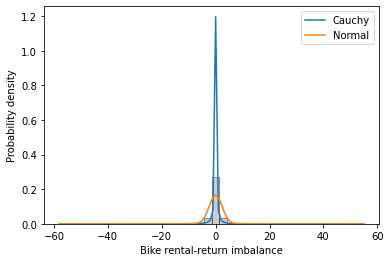

In [23]:
# probability distribution not including zero o_ridership and d_ridership
fit_mu, fit_sigma=stats.norm.fit(station_full_data_nonzero['imbalance'])
norm_pdf=stats.norm.pdf(np.sort(station_full_data_nonzero['imbalance']),fit_mu, fit_sigma)

fit_mu, fit_sigma=stats.cauchy.fit(station_full_data_nonzero['imbalance'])
cauchy_pdf=stats.cauchy.pdf(np.sort(station_full_data_nonzero['imbalance']),fit_mu, fit_sigma)

sns.distplot(a=station_full_data_nonzero['imbalance'], kde = False, bins=40, norm_hist = True, color='grey',
             hist_kws={"edgecolor": 'black'})
plt.plot(np.sort(station_full_data_nonzero['imbalance']),cauchy_pdf)
plt.plot(np.sort(station_full_data_nonzero['imbalance']),norm_pdf)
plt.legend(['Cauchy','Normal'])
#plt.ylim([0,0.05])
plt.xlabel('Bike rental-return imbalance')
plt.ylabel('Probability density')

D:\Software\Anaconda\Install\envs\gpd_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Probability density')

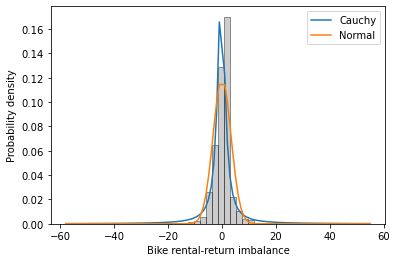

In [24]:
# probability distribution only for nonzero imbalance data
fit_mu, fit_sigma=stats.norm.fit(station_hour_data_imbalance['imbalance'])
norm_pdf=stats.norm.pdf(np.sort(station_hour_data_imbalance['imbalance']),fit_mu, fit_sigma)

fit_mu, fit_sigma=stats.cauchy.fit(station_hour_data_imbalance['imbalance'])
cauchy_pdf=stats.cauchy.pdf(np.sort(station_hour_data_imbalance['imbalance']),fit_mu, fit_sigma)

sns.distplot(a=station_hour_data_imbalance['imbalance'], kde = False, bins=50, norm_hist = True, color='grey',
             hist_kws={"edgecolor": 'black'})
plt.plot(np.sort(station_hour_data_imbalance['imbalance']),cauchy_pdf)
plt.plot(np.sort(station_hour_data_imbalance['imbalance']),norm_pdf)
plt.legend(['Cauchy','Normal'])
#plt.ylim([0,0.05])
plt.xlabel('Bike rental-return imbalance')
plt.ylabel('Probability density')

In [25]:
station_hour_data_imbalance_zero_rental = station_hour_data_imbalance.loc[station_hour_data_imbalance['imbalance'] > 0]
station_hour_data_imbalance_zero_return = station_hour_data_imbalance.loc[station_hour_data_imbalance['imbalance'] < 0]

In [26]:
station_hour_data_imbalance_zero_rental.head()

,start_station_id,start_lat,start_lng,month,day,hour,duration,distance,o_ridership,d_ridership,imbalance
5,31105.0,38.926791,-77.032201,1,1,0,12.150000,0.980281,10.0,0.0,10.0
7,31107.0,38.931909,-77.038792,1,1,0,19.350000,2.105487,10.0,0.0,10.0
10,31110.0,38.915402,-77.044600,1,1,0,6.450000,0.973820,8.0,0.0,8.0
11,31111.0,38.917199,-77.025901,1,1,0,9.450000,1.298823,8.0,0.0,8.0
15,31115.0,38.928118,-77.023790,1,1,0,6.808333,1.394739,7.0,0.0,7.0


In [27]:
station_hour_data_imbalance_mean_rental = gpd.GeoDataFrame(station_hour_data_imbalance_zero_rental[['start_station_id', 'start_lat', 'start_lng', 'imbalance']].groupby('start_station_id').mean().reset_index())
station_hour_data_imbalance_mean_return = gpd.GeoDataFrame(station_hour_data_imbalance_zero_return[['start_station_id', 'start_lat', 'start_lng', 'imbalance']].groupby('start_station_id').mean().reset_index())
station_hour_data_imbalance_mean_rental.head()

,start_station_id,start_lat,start_lng,imbalance
0,31100.0,38.900286,-77.042904,15.521088
1,31101.0,38.917768,-77.032078,15.154450
2,31102.0,38.929465,-77.027822,12.320723
3,31103.0,38.926122,-77.035430,11.000000
4,31104.0,38.922891,-77.042537,10.808569


## Station-level Information

In [28]:
station_info = pd.read_csv('Data/station_info_attribute.csv')
station_info['geometry'] = station_info[['start_lng', 'start_lat']].values.tolist()
station_info['geometry'] = station_info['geometry'].apply(Point)
station_info.head()

,start_station_id,start_lat,start_lng,TRACTCE,pop_den,male_ratio,white_ratio,median_age,housing_unit_den,LU_diversity,bike_density,dist_to_transit,geometry
0,31100.0,38.900286,-77.042904,10700,0.001987,0.488713,0.793306,32.4,0.001530,1.410208,0.609622,0.119084,POINT (-77.04290410015595 38.90028618933749)
1,31101.0,38.917768,-77.032078,4300,0.017128,0.420326,0.776735,34.2,0.010089,2.515274,0.744222,0.104652,POINT (-77.03207769009437 38.91776819509668)
2,31102.0,38.929465,-77.027822,3000,0.019992,0.476371,0.466488,30.4,0.007601,1.914395,0.407969,0.102094,POINT (-77.02782166867797 38.92946490355618)
3,31103.0,38.926122,-77.035430,3702,0.021065,0.345115,0.303116,28.7,0.011654,1.901085,0.567375,0.126291,POINT (-77.03543029492772 38.92612228939876)
4,31104.0,38.922891,-77.042537,3901,0.021215,0.402187,0.674312,38.2,0.014953,2.041013,0.527567,0.072376,POINT (-77.04253707600445 38.92289088349154)


## POI data

In [29]:
'''
import osmnx as ox
import geopandas as gpd

# Specify the location (place name, city, coordinates, or polygon)
place_name = "Washington D.C., USA"  # Replace with your desired location

pois = ox.geometries_from_place(place_name, tags={'amenity': True})

# Print the first few rows of the POI data
pois.head()

# Specify the path where you want to save the GeoJSON file
output_geojson_path = "Data/Shapefile/Washington_poi.geojson"

# Save the GeoDataFrame as a GeoJSON file
pois[['geometry', 'amenity', 'ele', 'name']].to_file(output_geojson_path, driver="GeoJSON")

'''

dc_poi_data = gpd.read_file('Data/Shapefile/Washington_poi.geojson')
dc_poi_data.head()

,element_type,osmid,amenity,ele,name,geometry
0,node,49839253,parking_entrance,None,None,POINT (-77.00272 38.90455)
1,node,60471261,bar,None,Cafe Saint Ex,POINT (-77.03170 38.91542)
2,node,292082777,parking_entrance,None,None,POINT (-77.00945 38.89377)
3,node,292082791,parking_entrance,None,None,POINT (-77.00868 38.89378)
4,node,306011118,fire_station,24,District of Columbia Fire and Emergency Medica...,POINT (-77.01611 38.90769)


In [30]:
poi_list = dc_poi_data['amenity'].unique()
poi_num = np.zeros_like(poi_list)
for i in range (len(poi_list)):
    poi_num[i] = np.sum(dc_poi_data['amenity'] == poi_list[i])
poi_df = pd.DataFrame({'amenity': poi_list,
                       'number': poi_num})

poi_df_sort = poi_df.sort_values(by='number', ascending=False)
poi_df_sort.head(40)

,amenity,number
23,parking,6212
37,bench,1664
29,restaurant,1071
4,place_of_worship,591
3,bicycle_parking,510
30,fast_food,500
103,parking_space,491
5,school,429
76,bicycle_rental,396
40,waste_basket,341


In [31]:
parking_poi = ['parking', 'parking_space', 'parking_entrance', 'car_sharing']
leisure_poi = ['pub', 'bar', 'theatre']
dining_poi = ['restaurant', 'cafe', 'fast_food']
school_poi = ['school', 'kindergarten', 'university', 'library']
service_poi = ['bank', 'waste_basket', 'post_box', 'post_office', 'pharmacy', 'atm', 'police', 'dentist', 'clinic']

In [32]:
# calcualte poi distance
poi_distance = np.zeros(len(station_info))

station_geo = gpd.GeoDataFrame({'geometry': station_info.geometry}, crs='EPSG:4326').to_crs('EPSG:5234')

index_list = dc_poi_data[dc_poi_data['amenity'].isin(parking_poi)]
poi_geo = gpd.GeoDataFrame({'geometry': index_list.geometry}, crs='EPSG:4326').to_crs('EPSG:5234')

for jj in range (len(station_info)):
    distance = []
    for kk in range (len(index_list)):
        distance.append(station_geo.iloc[jj]['geometry'].distance(poi_geo.iloc[kk]['geometry']) * 0.00062137)
    distance = np.array(distance)
    if np.min(distance) >= 1:
        poi_distance[jj] = np.min(distance)
    else:
        poi_distance[jj] = np.mean(distance[distance <= 1])
station_info['parking_poi'] = poi_distance.T
station_info.head()

,start_station_id,start_lat,start_lng,TRACTCE,pop_den,male_ratio,white_ratio,median_age,housing_unit_den,LU_diversity,bike_density,dist_to_transit,geometry,parking_poi
0,31100.0,38.900286,-77.042904,10700,0.001987,0.488713,0.793306,32.4,0.001530,1.410208,0.609622,0.119084,POINT (-77.04290410015595 38.90028618933749),0.616875
1,31101.0,38.917768,-77.032078,4300,0.017128,0.420326,0.776735,34.2,0.010089,2.515274,0.744222,0.104652,POINT (-77.03207769009437 38.91776819509668),0.644380
2,31102.0,38.929465,-77.027822,3000,0.019992,0.476371,0.466488,30.4,0.007601,1.914395,0.407969,0.102094,POINT (-77.02782166867797 38.92946490355618),0.652445
3,31103.0,38.926122,-77.035430,3702,0.021065,0.345115,0.303116,28.7,0.011654,1.901085,0.567375,0.126291,POINT (-77.03543029492772 38.92612228939876),0.611717
4,31104.0,38.922891,-77.042537,3901,0.021215,0.402187,0.674312,38.2,0.014953,2.041013,0.527567,0.072376,POINT (-77.04253707600445 38.92289088349154),0.649124


In [33]:
# calcualte poi distance
poi_distance = np.zeros(len(station_info))

station_geo = gpd.GeoDataFrame({'geometry': station_info.geometry}, crs='EPSG:4326').to_crs('EPSG:5234')

index_list = dc_poi_data[dc_poi_data['amenity'].isin(leisure_poi)]
poi_geo = gpd.GeoDataFrame({'geometry': index_list.geometry}, crs='EPSG:4326').to_crs('EPSG:5234')

for jj in range (len(station_info)):
    distance = []
    for kk in range (len(index_list)):
        distance.append(station_geo.iloc[jj]['geometry'].distance(poi_geo.iloc[kk]['geometry']) * 0.00062137)
    distance = np.array(distance)
    if np.min(distance) >= 1:
        poi_distance[jj] = np.min(distance)
    else:
        poi_distance[jj] = np.mean(distance[distance <= 1])
station_info['leisure_poi'] = poi_distance.T
station_info.head()

,start_station_id,start_lat,start_lng,TRACTCE,pop_den,male_ratio,white_ratio,median_age,housing_unit_den,LU_diversity,bike_density,dist_to_transit,geometry,parking_poi,leisure_poi
0,31100.0,38.900286,-77.042904,10700,0.001987,0.488713,0.793306,32.4,0.001530,1.410208,0.609622,0.119084,POINT (-77.04290410015595 38.90028618933749),0.616875,0.665430
1,31101.0,38.917768,-77.032078,4300,0.017128,0.420326,0.776735,34.2,0.010089,2.515274,0.744222,0.104652,POINT (-77.03207769009437 38.91776819509668),0.644380,0.578422
2,31102.0,38.929465,-77.027822,3000,0.019992,0.476371,0.466488,30.4,0.007601,1.914395,0.407969,0.102094,POINT (-77.02782166867797 38.92946490355618),0.652445,0.697954
3,31103.0,38.926122,-77.035430,3702,0.021065,0.345115,0.303116,28.7,0.011654,1.901085,0.567375,0.126291,POINT (-77.03543029492772 38.92612228939876),0.611717,0.695318
4,31104.0,38.922891,-77.042537,3901,0.021215,0.402187,0.674312,38.2,0.014953,2.041013,0.527567,0.072376,POINT (-77.04253707600445 38.92289088349154),0.649124,0.646389


In [34]:
# calcualte poi distance
poi_distance = np.zeros(len(station_info))

station_geo = gpd.GeoDataFrame({'geometry': station_info.geometry}, crs='EPSG:4326').to_crs('EPSG:5234')

index_list = dc_poi_data[dc_poi_data['amenity'].isin(dining_poi)]
poi_geo = gpd.GeoDataFrame({'geometry': index_list.geometry}, crs='EPSG:4326').to_crs('EPSG:5234')

for jj in range (len(station_info)):
    distance = []
    for kk in range (len(index_list)):
        distance.append(station_geo.iloc[jj]['geometry'].distance(poi_geo.iloc[kk]['geometry']) * 0.00062137)
    distance = np.array(distance)
    if np.min(distance) >= 1:
        poi_distance[jj] = np.min(distance)
    else:
        poi_distance[jj] = np.mean(distance[distance <= 1])
station_info['dining_poi'] = poi_distance.T
station_info.head()

,start_station_id,start_lat,start_lng,TRACTCE,pop_den,male_ratio,white_ratio,median_age,housing_unit_den,LU_diversity,bike_density,dist_to_transit,geometry,parking_poi,leisure_poi,dining_poi
0,31100.0,38.900286,-77.042904,10700,0.001987,0.488713,0.793306,32.4,0.001530,1.410208,0.609622,0.119084,POINT (-77.04290410015595 38.90028618933749),0.616875,0.665430,0.564018
1,31101.0,38.917768,-77.032078,4300,0.017128,0.420326,0.776735,34.2,0.010089,2.515274,0.744222,0.104652,POINT (-77.03207769009437 38.91776819509668),0.644380,0.578422,0.654045
2,31102.0,38.929465,-77.027822,3000,0.019992,0.476371,0.466488,30.4,0.007601,1.914395,0.407969,0.102094,POINT (-77.02782166867797 38.92946490355618),0.652445,0.697954,0.663388
3,31103.0,38.926122,-77.035430,3702,0.021065,0.345115,0.303116,28.7,0.011654,1.901085,0.567375,0.126291,POINT (-77.03543029492772 38.92612228939876),0.611717,0.695318,0.656673
4,31104.0,38.922891,-77.042537,3901,0.021215,0.402187,0.674312,38.2,0.014953,2.041013,0.527567,0.072376,POINT (-77.04253707600445 38.92289088349154),0.649124,0.646389,0.617660


In [35]:
# calcualte poi distance
poi_distance = np.zeros(len(station_info))

station_geo = gpd.GeoDataFrame({'geometry': station_info.geometry}, crs='EPSG:4326').to_crs('EPSG:5234')

index_list = dc_poi_data[dc_poi_data['amenity'].isin(school_poi)]
poi_geo = gpd.GeoDataFrame({'geometry': index_list.geometry}, crs='EPSG:4326').to_crs('EPSG:5234')

for jj in range (len(station_info)):
    distance = []
    for kk in range (len(index_list)):
        distance.append(station_geo.iloc[jj]['geometry'].distance(poi_geo.iloc[kk]['geometry']) * 0.00062137)
    distance = np.array(distance)
    if np.min(distance) >= 1:
        poi_distance[jj] = np.min(distance)
    else:
        poi_distance[jj] = np.mean(distance[distance <= 1])
station_info['school_poi'] = poi_distance.T
station_info.head()

,start_station_id,start_lat,start_lng,TRACTCE,pop_den,male_ratio,white_ratio,median_age,housing_unit_den,LU_diversity,bike_density,dist_to_transit,geometry,parking_poi,leisure_poi,dining_poi,school_poi
0,31100.0,38.900286,-77.042904,10700,0.001987,0.488713,0.793306,32.4,0.001530,1.410208,0.609622,0.119084,POINT (-77.04290410015595 38.90028618933749),0.616875,0.665430,0.564018,0.486901
1,31101.0,38.917768,-77.032078,4300,0.017128,0.420326,0.776735,34.2,0.010089,2.515274,0.744222,0.104652,POINT (-77.03207769009437 38.91776819509668),0.644380,0.578422,0.654045,0.650378
2,31102.0,38.929465,-77.027822,3000,0.019992,0.476371,0.466488,30.4,0.007601,1.914395,0.407969,0.102094,POINT (-77.02782166867797 38.92946490355618),0.652445,0.697954,0.663388,0.616868
3,31103.0,38.926122,-77.035430,3702,0.021065,0.345115,0.303116,28.7,0.011654,1.901085,0.567375,0.126291,POINT (-77.03543029492772 38.92612228939876),0.611717,0.695318,0.656673,0.532202
4,31104.0,38.922891,-77.042537,3901,0.021215,0.402187,0.674312,38.2,0.014953,2.041013,0.527567,0.072376,POINT (-77.04253707600445 38.92289088349154),0.649124,0.646389,0.617660,0.656174


In [36]:
# calcualte poi distance
poi_distance = np.zeros(len(station_info))

station_geo = gpd.GeoDataFrame({'geometry': station_info.geometry}, crs='EPSG:4326').to_crs('EPSG:5234')

index_list = dc_poi_data[dc_poi_data['amenity'].isin(service_poi)]
poi_geo = gpd.GeoDataFrame({'geometry': index_list.geometry}, crs='EPSG:4326').to_crs('EPSG:5234')

for jj in range (len(station_info)):
    distance = []
    for kk in range (len(index_list)):
        distance.append(station_geo.iloc[jj]['geometry'].distance(poi_geo.iloc[kk]['geometry']) * 0.00062137)
    distance = np.array(distance)
    if np.min(distance) >= 1:
        poi_distance[jj] = np.min(distance)
    else:
        poi_distance[jj] = np.mean(distance[distance <= 1])
station_info['service_poi'] = poi_distance.T
station_info.head()

,start_station_id,start_lat,start_lng,TRACTCE,pop_den,male_ratio,white_ratio,median_age,housing_unit_den,LU_diversity,bike_density,dist_to_transit,geometry,parking_poi,leisure_poi,dining_poi,school_poi,service_poi
0,31100.0,38.900286,-77.042904,10700,0.001987,0.488713,0.793306,32.4,0.001530,1.410208,0.609622,0.119084,POINT (-77.04290410015595 38.90028618933749),0.616875,0.665430,0.564018,0.486901,0.490721
1,31101.0,38.917768,-77.032078,4300,0.017128,0.420326,0.776735,34.2,0.010089,2.515274,0.744222,0.104652,POINT (-77.03207769009437 38.91776819509668),0.644380,0.578422,0.654045,0.650378,0.668175
2,31102.0,38.929465,-77.027822,3000,0.019992,0.476371,0.466488,30.4,0.007601,1.914395,0.407969,0.102094,POINT (-77.02782166867797 38.92946490355618),0.652445,0.697954,0.663388,0.616868,0.616373
3,31103.0,38.926122,-77.035430,3702,0.021065,0.345115,0.303116,28.7,0.011654,1.901085,0.567375,0.126291,POINT (-77.03543029492772 38.92612228939876),0.611717,0.695318,0.656673,0.532202,0.591786
4,31104.0,38.922891,-77.042537,3901,0.021215,0.402187,0.674312,38.2,0.014953,2.041013,0.527567,0.072376,POINT (-77.04253707600445 38.92289088349154),0.649124,0.646389,0.617660,0.656174,0.646104


In [77]:
#station_info.to_csv('Data/station_info_attribute_poi.csv', index = False)

## Station information statistics

In [37]:
station_info.describe()

,start_station_id,start_lat,start_lng,TRACTCE,pop_den,male_ratio,white_ratio,median_age,housing_unit_den,LU_diversity,bike_density,dist_to_transit,parking_poi,leisure_poi,dining_poi,school_poi,service_poi
count,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,338.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000
mean,31435.716292,38.904677,-77.017778,55648.884831,0.007079,0.504471,0.561966,34.875740,0.003669,1.948175,0.391732,0.172366,0.652965,0.685373,0.640715,0.638021,0.637938
std,228.959633,0.026141,0.031552,213635.005853,0.005811,0.135342,0.303198,6.522757,0.003777,0.434269,0.279567,0.112888,0.053167,0.215361,0.101289,0.077508,0.091701
min,31100.000000,38.819090,-77.103663,102.000000,0.000002,0.313305,0.002224,19.500000,0.000000,0.610679,0.000000,0.037175,0.253752,0.114857,0.193623,0.181334,0.198277
25%,31250.750000,38.890487,-77.038344,4002.000000,0.002890,0.437224,0.285001,31.700000,0.001526,1.671618,0.146475,0.108488,0.625065,0.578298,0.581676,0.595666,0.595395
50%,31406.500000,38.902738,-77.021612,7202.000000,0.005237,0.480239,0.661227,34.200000,0.002401,1.925774,0.354422,0.141525,0.648185,0.661332,0.643886,0.640153,0.650463
75%,31633.250000,38.920668,-76.997163,9604.000000,0.009699,0.527633,0.802131,37.400000,0.004531,2.248437,0.609255,0.200635,0.678383,0.731341,0.694007,0.682726,0.699614
max,32901.000000,38.975221,-76.913571,980000.000000,0.032584,1.000000,1.000000,54.600000,0.027061,2.809673,1.000000,0.991371,0.851342,2.177107,1.132316,0.900257,0.854415


In [43]:
# merge station_hour_data_imbalance with station_info
station_hour_data_imbalance_rental_BART = station_hour_data_imbalance_mean_rental.merge(station_info[['start_station_id','pop_den','male_ratio','white_ratio','median_age','LU_diversity','bike_density','dist_to_transit', 'parking_poi', 'leisure_poi', 'dining_poi', 'school_poi', 'service_poi']], how = 'left', on = 'start_station_id')
station_hour_data_imbalance_rental_BART = station_hour_data_imbalance_rental_BART.drop(columns = ['start_station_id', 'start_lat', 'start_lng'])
station_hour_data_imbalance_rental_BART.head()

,imbalance,pop_den,male_ratio,white_ratio,median_age,LU_diversity,bike_density,dist_to_transit,parking_poi,leisure_poi,dining_poi,school_poi,service_poi
0,15.521088,0.001987,0.488713,0.793306,32.4,1.410208,0.609622,0.119084,0.616875,0.665430,0.564018,0.486901,0.490721
1,15.154450,0.017128,0.420326,0.776735,34.2,2.515274,0.744222,0.104652,0.644380,0.578422,0.654045,0.650378,0.668175
2,12.320723,0.019992,0.476371,0.466488,30.4,1.914395,0.407969,0.102094,0.652445,0.697954,0.663388,0.616868,0.616373
3,11.000000,0.021065,0.345115,0.303116,28.7,1.901085,0.567375,0.126291,0.611717,0.695318,0.656673,0.532202,0.591786
4,10.808569,0.021215,0.402187,0.674312,38.2,2.041013,0.527567,0.072376,0.649124,0.646389,0.617660,0.656174,0.646104


In [44]:
# merge station_hour_data_imbalance with station_info
station_hour_data_imbalance_return_BART = station_hour_data_imbalance_mean_return.merge(station_info[['start_station_id','pop_den','male_ratio','white_ratio','median_age','LU_diversity','bike_density','dist_to_transit', 'parking_poi', 'leisure_poi', 'dining_poi', 'school_poi', 'service_poi']], how = 'left', on = 'start_station_id')
station_hour_data_imbalance_return_BART = station_hour_data_imbalance_return_BART.drop(columns = ['start_station_id', 'start_lat', 'start_lng'])
station_hour_data_imbalance_return_BART.head()

,imbalance,pop_den,male_ratio,white_ratio,median_age,LU_diversity,bike_density,dist_to_transit,parking_poi,leisure_poi,dining_poi,school_poi,service_poi
0,-22.676522,0.001987,0.488713,0.793306,32.4,1.410208,0.609622,0.119084,0.616875,0.665430,0.564018,0.486901,0.490721
1,-6.655914,0.017128,0.420326,0.776735,34.2,2.515274,0.744222,0.104652,0.644380,0.578422,0.654045,0.650378,0.668175
2,-5.973726,0.019992,0.476371,0.466488,30.4,1.914395,0.407969,0.102094,0.652445,0.697954,0.663388,0.616868,0.616373
3,-6.619565,0.021065,0.345115,0.303116,28.7,1.901085,0.567375,0.126291,0.611717,0.695318,0.656673,0.532202,0.591786
4,-3.161328,0.021215,0.402187,0.674312,38.2,2.041013,0.527567,0.072376,0.649124,0.646389,0.617660,0.656174,0.646104


In [45]:
station_hour_data_imbalance_rental_BART.columns

Index(['imbalance', 'pop_den', 'male_ratio', 'white_ratio', 'median_age',
       'LU_diversity', 'bike_density', 'dist_to_transit', 'parking_poi',
       'leisure_poi', 'dining_poi', 'school_poi', 'service_poi'],
      dtype='object')

In [46]:
station_hour_data_imbalance_return_BART.columns

Index(['imbalance', 'pop_den', 'male_ratio', 'white_ratio', 'median_age',
       'LU_diversity', 'bike_density', 'dist_to_transit', 'parking_poi',
       'leisure_poi', 'dining_poi', 'school_poi', 'service_poi'],
      dtype='object')

## BART Rental Model

In [72]:
## ======================================================= BART Model ================================================ ##
from pathlib import Path

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pymc_bart as pmb
import random

RANDOM_SEED = 5781
np.random.seed(RANDOM_SEED)
az.style.use("arviz-darkgrid")

X = station_hour_data_imbalance_rental_BART.copy()
X = X.fillna(X['median_age'].mean())
X = X.drop(columns = ['imbalance'])

Y = station_hour_data_imbalance_rental_BART['imbalance'].fillna(0)
X.head()

,pop_den,male_ratio,white_ratio,median_age,LU_diversity,bike_density,dist_to_transit,parking_poi,leisure_poi,dining_poi,school_poi,service_poi
0,0.001987,0.488713,0.793306,32.4,1.410208,0.609622,0.119084,0.616875,0.665430,0.564018,0.486901,0.490721
1,0.017128,0.420326,0.776735,34.2,2.515274,0.744222,0.104652,0.644380,0.578422,0.654045,0.650378,0.668175
2,0.019992,0.476371,0.466488,30.4,1.914395,0.407969,0.102094,0.652445,0.697954,0.663388,0.616868,0.616373
3,0.021065,0.345115,0.303116,28.7,1.901085,0.567375,0.126291,0.611717,0.695318,0.656673,0.532202,0.591786
4,0.021215,0.402187,0.674312,38.2,2.041013,0.527567,0.072376,0.649124,0.646389,0.617660,0.656174,0.646104


In [73]:
with pm.Model() as model_bikes:
    σ = pm.ChiSquared("σ", 3)
    ε = pm.HalfNormal("ε", abs(σ))
    μ = pmb.BART("μ", X, Y, m = 200)
    y = pm.Cauchy("y", μ, abs(ε), observed=Y)
    idata_bikes = pm.sample(random_seed=RANDOM_SEED)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [σ, ε]
>PGBART: [μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 8368 seconds.


D:\Software\Anaconda\Install\envs\gpd_env\lib\site-packages\arviz\plots\hdiplot.py:156: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
D:\Software\Anaconda\Install\envs\gpd_env\lib\site-packages\arviz\plots\hdiplot.py:156: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
D:\Software\Anaconda\Install\envs\gpd_env\lib\site-packages\arviz\plots\hdiplot.py:156: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_

array([<AxesSubplot:xlabel='pop_den'>, <AxesSubplot:xlabel='male_ratio'>,
       <AxesSubplot:xlabel='white_ratio'>,
       <AxesSubplot:xlabel='median_age'>,
       <AxesSubplot:xlabel='LU_diversity'>,
       <AxesSubplot:xlabel='bike_density'>,
       <AxesSubplot:xlabel='dist_to_transit'>,
       <AxesSubplot:xlabel='parking_poi'>,
       <AxesSubplot:xlabel='leisure_poi'>,
       <AxesSubplot:xlabel='dining_poi'>,
       <AxesSubplot:xlabel='school_poi'>,
       <AxesSubplot:xlabel='service_poi'>], dtype=object)

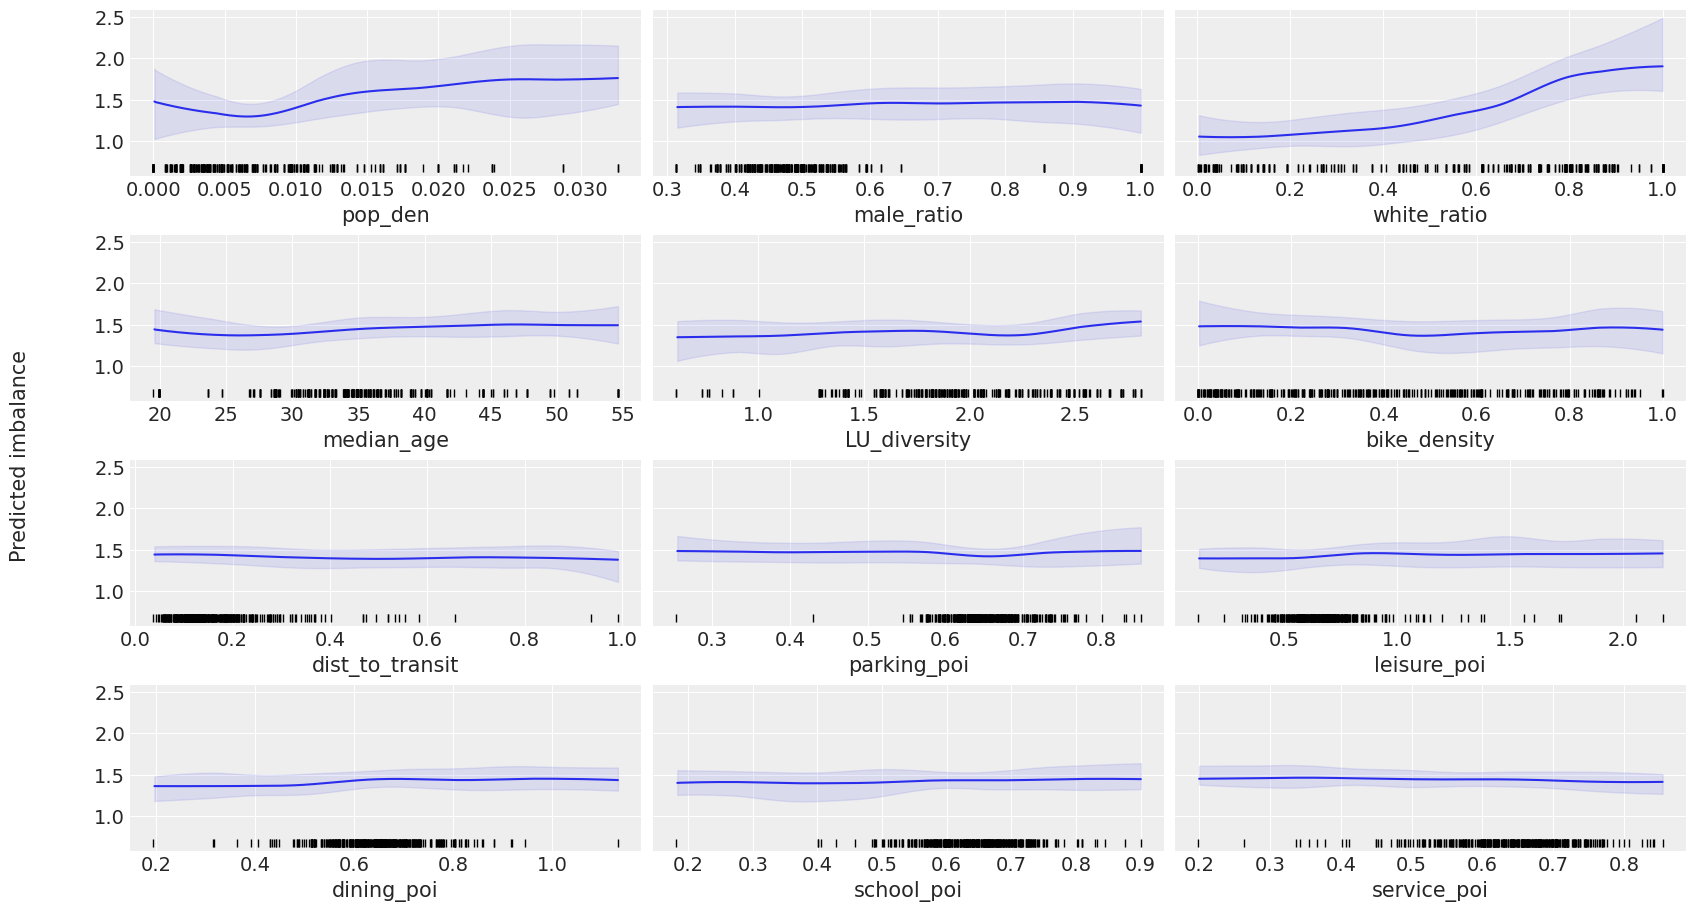

In [74]:
plt.rc('font', size=8)
pmb.plot_dependence(μ, X=X, Y=Y,grid=(4,3), figsize=(16,9))

array([<AxesSubplot:xlabel='pop_den'>, <AxesSubplot:xlabel='male_ratio'>,
       <AxesSubplot:xlabel='white_ratio'>,
       <AxesSubplot:xlabel='median_age'>,
       <AxesSubplot:xlabel='LU_diversity'>,
       <AxesSubplot:xlabel='bike_density'>,
       <AxesSubplot:xlabel='dist_to_transit'>,
       <AxesSubplot:xlabel='parking_poi'>,
       <AxesSubplot:xlabel='leisure_poi'>,
       <AxesSubplot:xlabel='dining_poi'>,
       <AxesSubplot:xlabel='school_poi'>,
       <AxesSubplot:xlabel='service_poi'>], dtype=object)

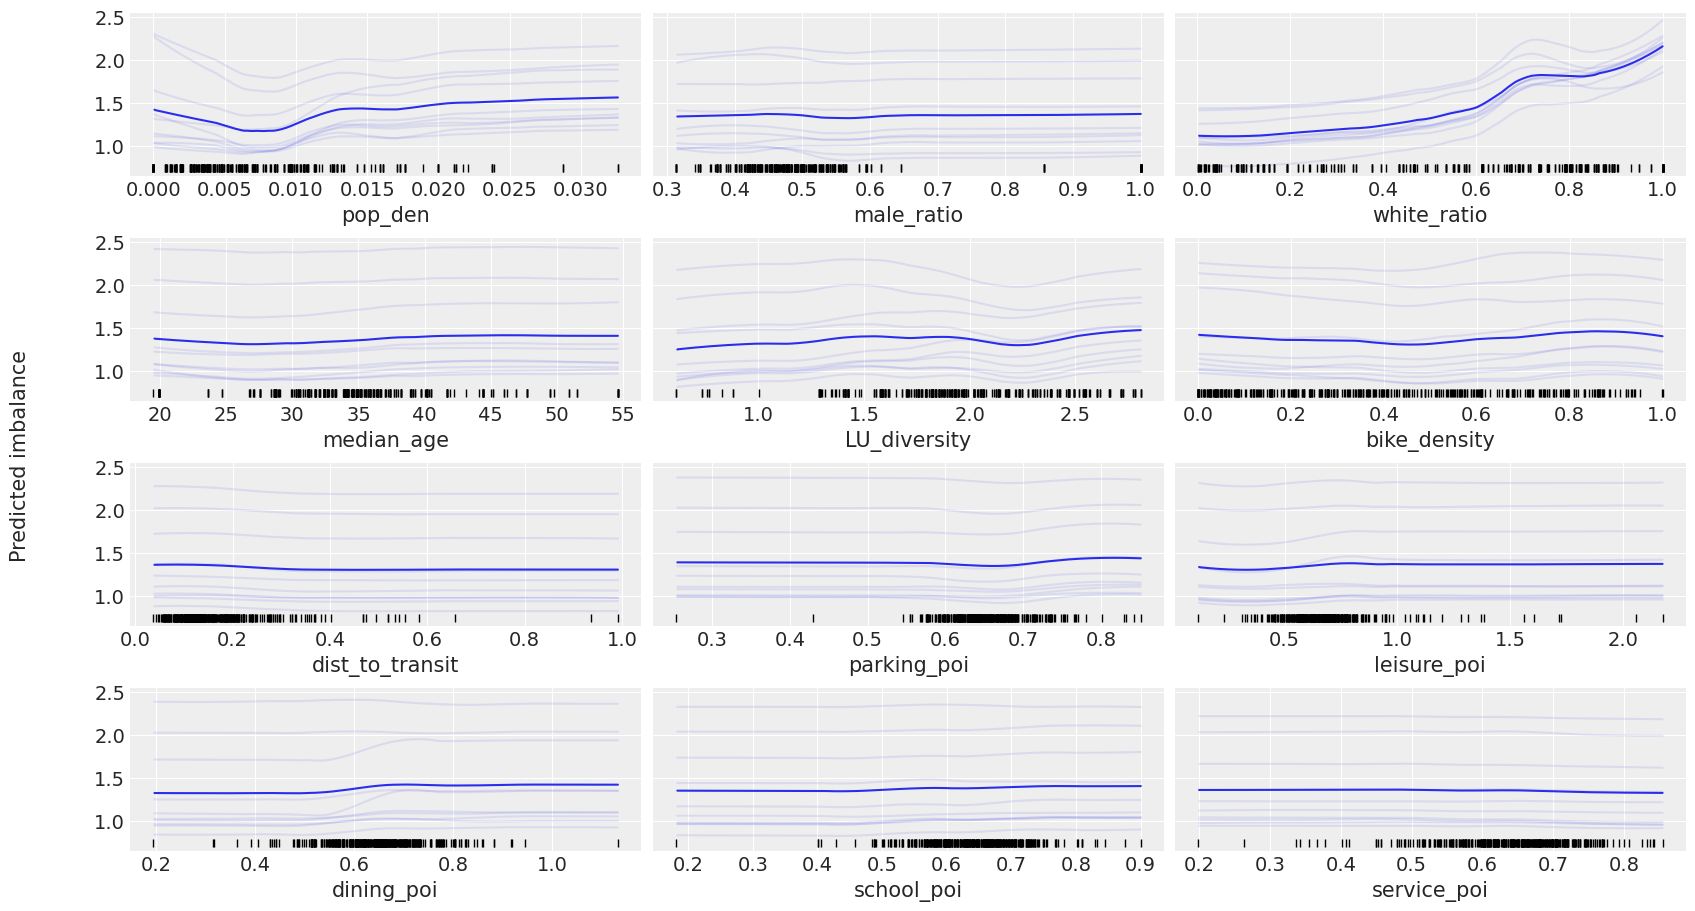

In [75]:
# 5,  4,  6,  3, 14,  1,  9,  2, 17,  10, 19,  7, 11,  8, 12, 15, 16, 20, 13, 18
plt.rc('font', size=8) 
pmb.plot_dependence(μ, X=X, Y=Y, kind='ice', grid=(4,3), figsize=(16,9))

(array([ 0,  2,  5,  1,  4,  9,  7,  3,  8, 10,  6, 11], dtype=int64),
 array([<AxesSubplot:xlabel='covariables', ylabel='importance'>,
        <AxesSubplot:xlabel='number of covariables', ylabel='R²'>],
       dtype=object))

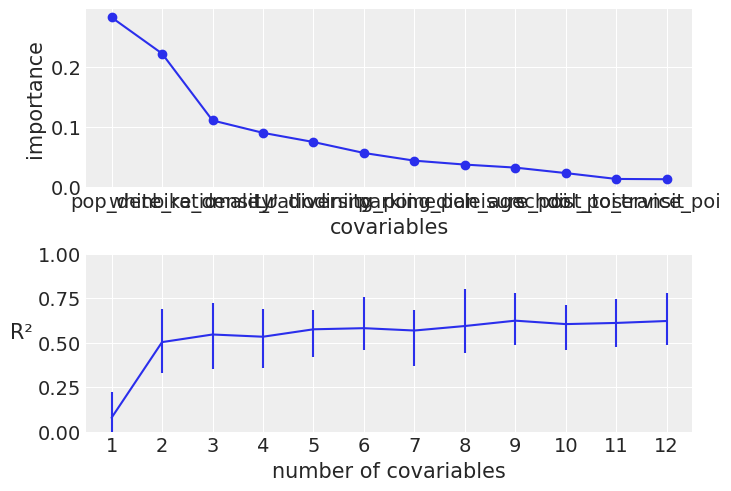

In [76]:
# 'pop_den', 'male_ratio', 'white_ratio', 'median_age', 'LU_diversity', 'bike_density', 'dist_to_transit', 'parking_poi', 'leisure_poi', 'dining_poi', 'school_poi', 'service_poi'
pmb.plot_variable_importance(idata_bikes, μ, X, samples=100)
# 'pop_den', 'white_ratio', 'bike_density', 'male_ratio', 'LU_diversity', 'dining_poi', 'parking_poi', 'median_age', 'leisure_poi', 'school_poi', 'dist_to_transit', 'service_poi'

Feature Ranking:
1. features 0 (0.270895)
2. features 2 (0.098057)
3. features 10 (0.097418)
4. features 9 (0.092665)
5. features 5 (0.090078)
6. features 7 (0.067116)
7. features 11 (0.062496)
8. features 6 (0.057380)
9. features 8 (0.047359)
10. features 1 (0.043967)
11. features 3 (0.037599)
12. features 4 (0.034971)


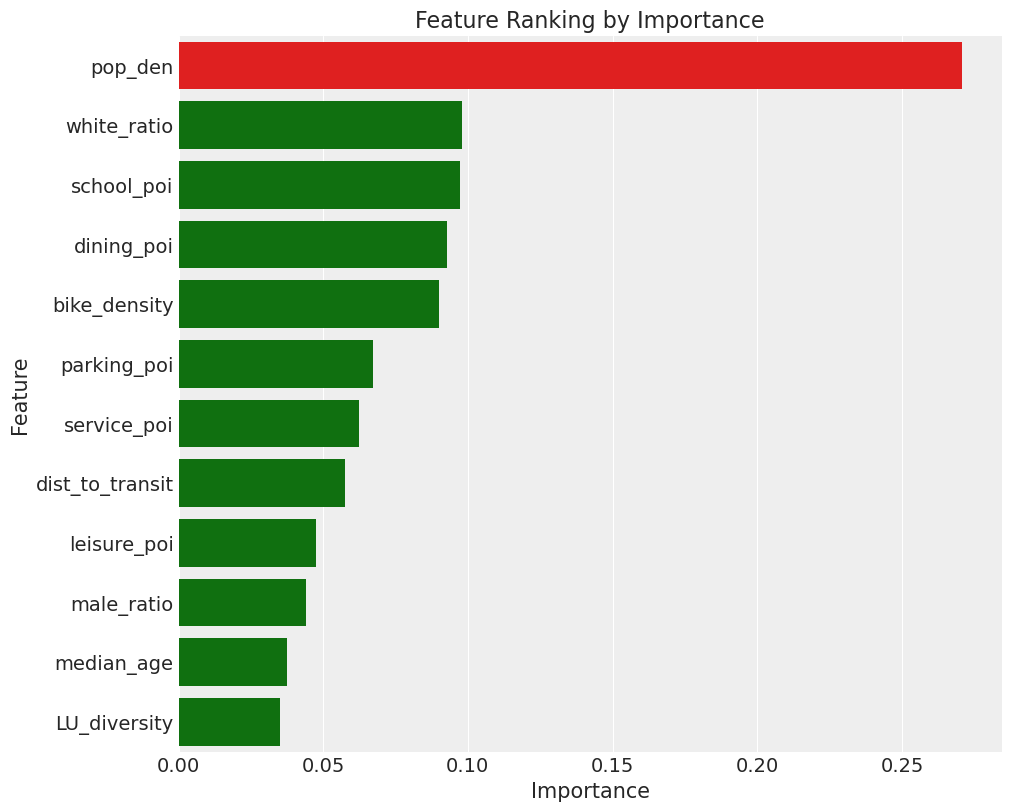

In [77]:
## Random Forest
# Feature selection based on random forest
from sklearn.ensemble import RandomForestRegressor as RRlf 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state=100)

RF_model = RRlf(n_estimators = 100)
RF_model.fit(X_train, y_train)
importances = RF_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF_model.estimators_], axis = 0)

indices = np.argsort(importances)[::-1]

print('Feature Ranking:')
array_feature_RF = []
for f in range(X_train.shape[1]):
    print('%d. features %d (%f)'% (f+1, indices[f], importances[indices[f]]))
    array_feature_RF.append([X_train.columns[indices[f]], importances[indices[f]]])
array_feature_RF = np.array(array_feature_RF)
df_feature_RF = pd.DataFrame({'Feature': array_feature_RF[:, 0],
                             'Importance': array_feature_RF[:, 1]})

values = df_feature_RF.Importance.iloc[0:21]    
idx = df_feature_RF.Feature.iloc[0:21]  
plt.figure(figsize=(10,8))
clrs = ['green' if (x < max(values)) else 'red' for x in values ]
sns.barplot(y = idx, x = values.astype('float'), palette = clrs).set(title = 'Feature Ranking by Importance')
plt.show()

Feature Importances :  [0.19197273 0.0521602  0.12209316 0.03547373 0.09565125 0.13135363
 0.02082166 0.04636483 0.05584971 0.16221341 0.05024845 0.03579721]


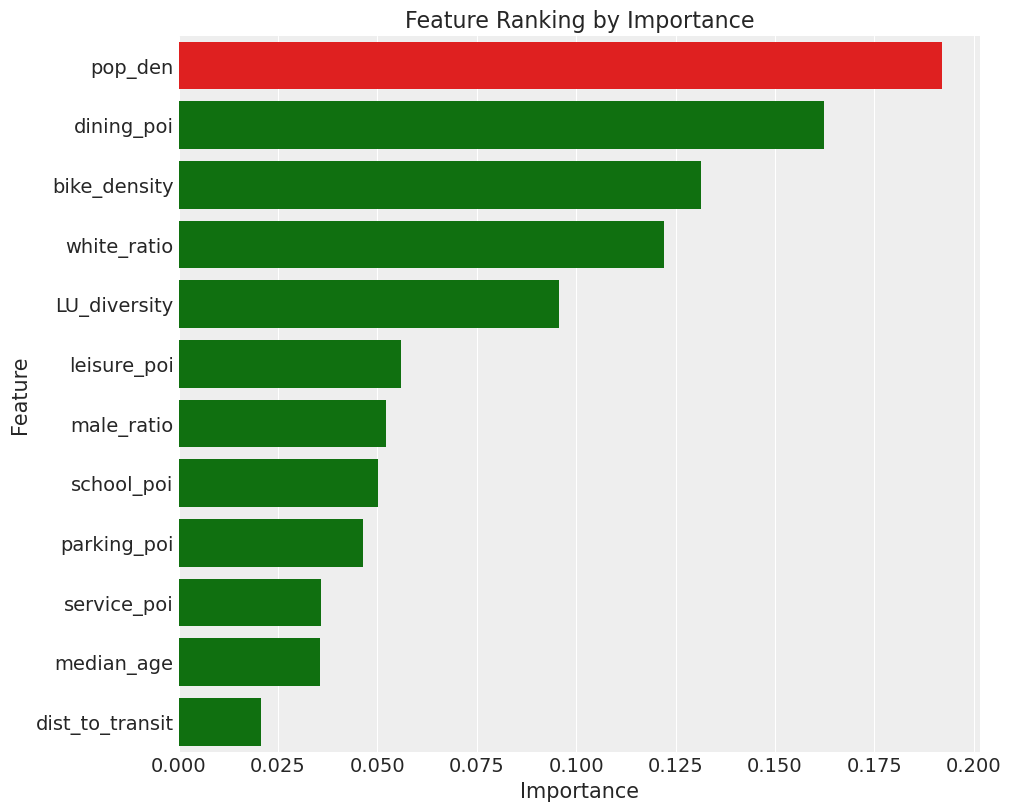

In [78]:
# Feature selection based on XGBoost
from xgboost import XGBRegressor
from xgboost import plot_importance

# fit model to training data
xgb_model = XGBRegressor(random_state = 100)
xgb_model.fit(X_train, y_train)

print("Feature Importances : ", xgb_model.feature_importances_)

'''
# plot feature importance
plot_importance(xgb_model)
plt.show()
'''

xgboost_idx = np.flip(np.argsort(xgb_model.feature_importances_))
xgboost_feature_plot = X_train.columns[xgboost_idx].to_numpy()
xgboost_importance_plot = xgb_model.feature_importances_[xgboost_idx]
df_feature_xgboost = pd.DataFrame({'Feature': xgboost_feature_plot,
                             'Importance': xgboost_importance_plot})

values = df_feature_xgboost.Importance.iloc[0:21]  
idx = df_feature_xgboost.Feature.iloc[0:21]  
plt.figure(figsize=(10,8))
clrs = ['green' if (x < max(values)) else 'red' for x in values ]
sns.barplot(y = idx, x = values.astype('float'), palette = clrs).set(title = 'Feature Ranking by Importance')
plt.show()

## BART Return Model

In [79]:
## ======================================================= BART Model ================================================ ##
from pathlib import Path

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pymc_bart as pmb
import random

RANDOM_SEED = 5782
np.random.seed(RANDOM_SEED)
az.style.use("arviz-darkgrid")

X = station_hour_data_imbalance_return_BART.copy()
X = X.fillna(X['median_age'].mean())
X = X.drop(columns = ['imbalance'])

Y = station_hour_data_imbalance_return_BART['imbalance'].fillna(0)
X.head()

,pop_den,male_ratio,white_ratio,median_age,LU_diversity,bike_density,dist_to_transit,parking_poi,leisure_poi,dining_poi,school_poi,service_poi
0,0.001987,0.488713,0.793306,32.4,1.410208,0.609622,0.119084,0.616875,0.665430,0.564018,0.486901,0.490721
1,0.017128,0.420326,0.776735,34.2,2.515274,0.744222,0.104652,0.644380,0.578422,0.654045,0.650378,0.668175
2,0.019992,0.476371,0.466488,30.4,1.914395,0.407969,0.102094,0.652445,0.697954,0.663388,0.616868,0.616373
3,0.021065,0.345115,0.303116,28.7,1.901085,0.567375,0.126291,0.611717,0.695318,0.656673,0.532202,0.591786
4,0.021215,0.402187,0.674312,38.2,2.041013,0.527567,0.072376,0.649124,0.646389,0.617660,0.656174,0.646104


In [80]:
with pm.Model() as model_bikes:
    σ = pm.ChiSquared("σ", 3)
    ε = pm.HalfNormal("ε", abs(σ))
    μ = pmb.BART("μ", X, Y, m = 200)
    y = pm.Cauchy("y", μ, abs(ε), observed=Y)
    idata_bikes = pm.sample(random_seed=RANDOM_SEED)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [σ, ε]
>PGBART: [μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 7508 seconds.


D:\Software\Anaconda\Install\envs\gpd_env\lib\site-packages\arviz\plots\hdiplot.py:156: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
D:\Software\Anaconda\Install\envs\gpd_env\lib\site-packages\arviz\plots\hdiplot.py:156: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
D:\Software\Anaconda\Install\envs\gpd_env\lib\site-packages\arviz\plots\hdiplot.py:156: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_

array([<AxesSubplot:xlabel='pop_den'>, <AxesSubplot:xlabel='male_ratio'>,
       <AxesSubplot:xlabel='white_ratio'>,
       <AxesSubplot:xlabel='median_age'>,
       <AxesSubplot:xlabel='LU_diversity'>,
       <AxesSubplot:xlabel='bike_density'>,
       <AxesSubplot:xlabel='dist_to_transit'>,
       <AxesSubplot:xlabel='parking_poi'>,
       <AxesSubplot:xlabel='leisure_poi'>,
       <AxesSubplot:xlabel='dining_poi'>,
       <AxesSubplot:xlabel='school_poi'>,
       <AxesSubplot:xlabel='service_poi'>], dtype=object)

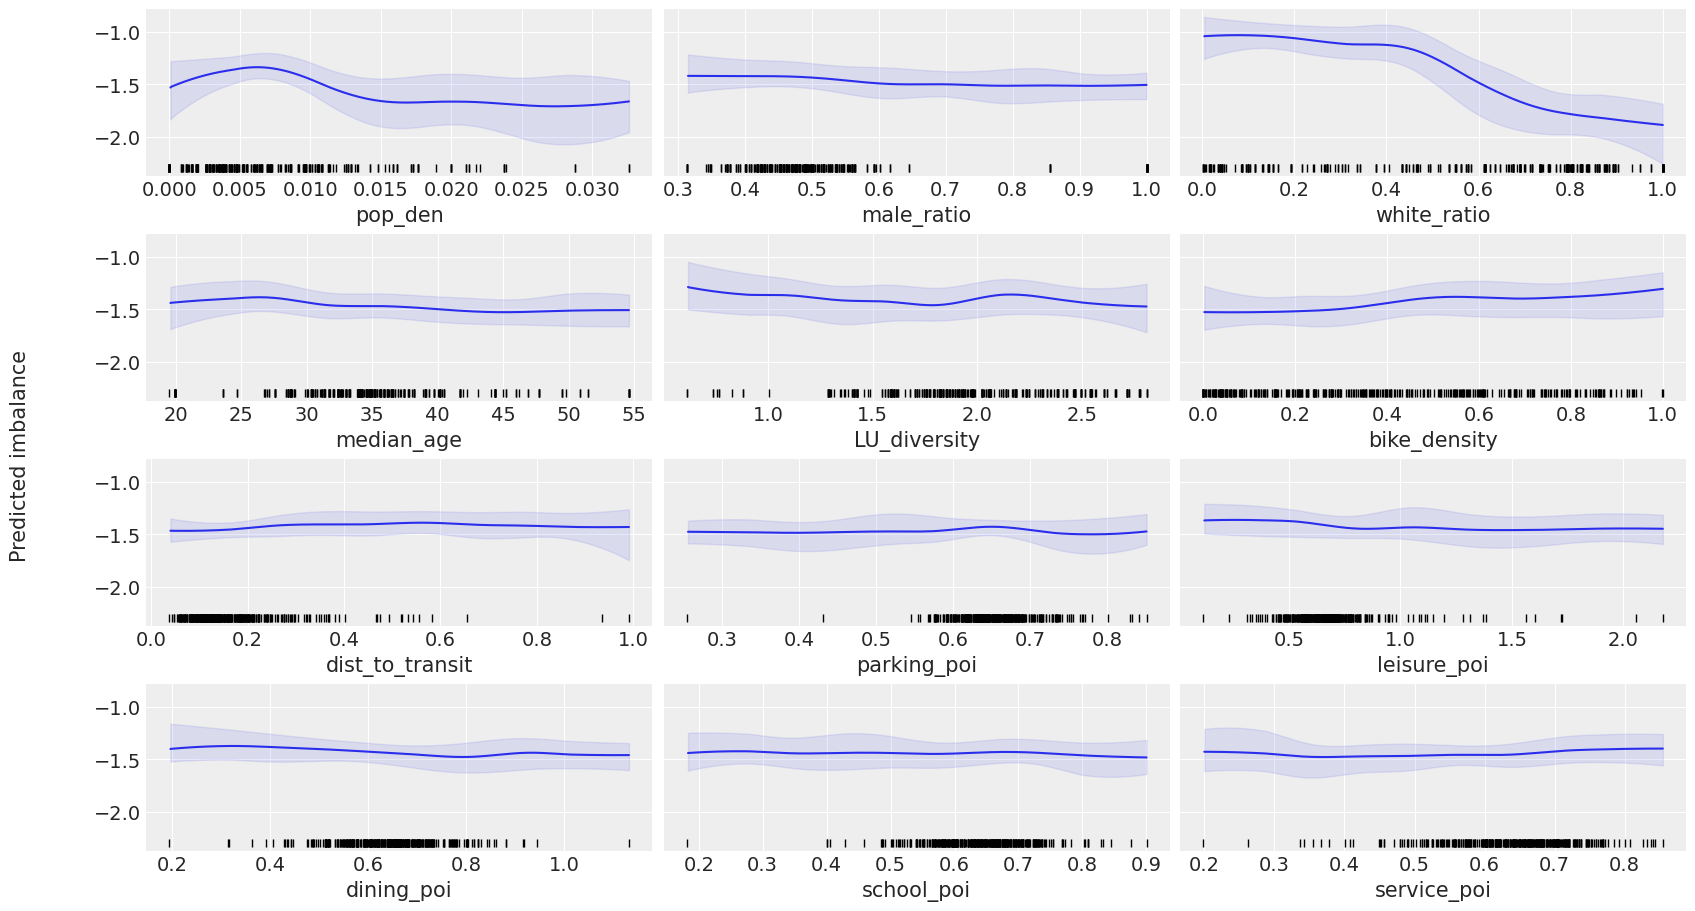

In [81]:
plt.rc('font', size=8)
pmb.plot_dependence(μ, X=X, Y=Y,grid=(4,3), figsize=(16,9))

array([<AxesSubplot:xlabel='pop_den'>, <AxesSubplot:xlabel='male_ratio'>,
       <AxesSubplot:xlabel='white_ratio'>,
       <AxesSubplot:xlabel='median_age'>,
       <AxesSubplot:xlabel='LU_diversity'>,
       <AxesSubplot:xlabel='bike_density'>,
       <AxesSubplot:xlabel='dist_to_transit'>,
       <AxesSubplot:xlabel='parking_poi'>,
       <AxesSubplot:xlabel='leisure_poi'>,
       <AxesSubplot:xlabel='dining_poi'>,
       <AxesSubplot:xlabel='school_poi'>,
       <AxesSubplot:xlabel='service_poi'>], dtype=object)

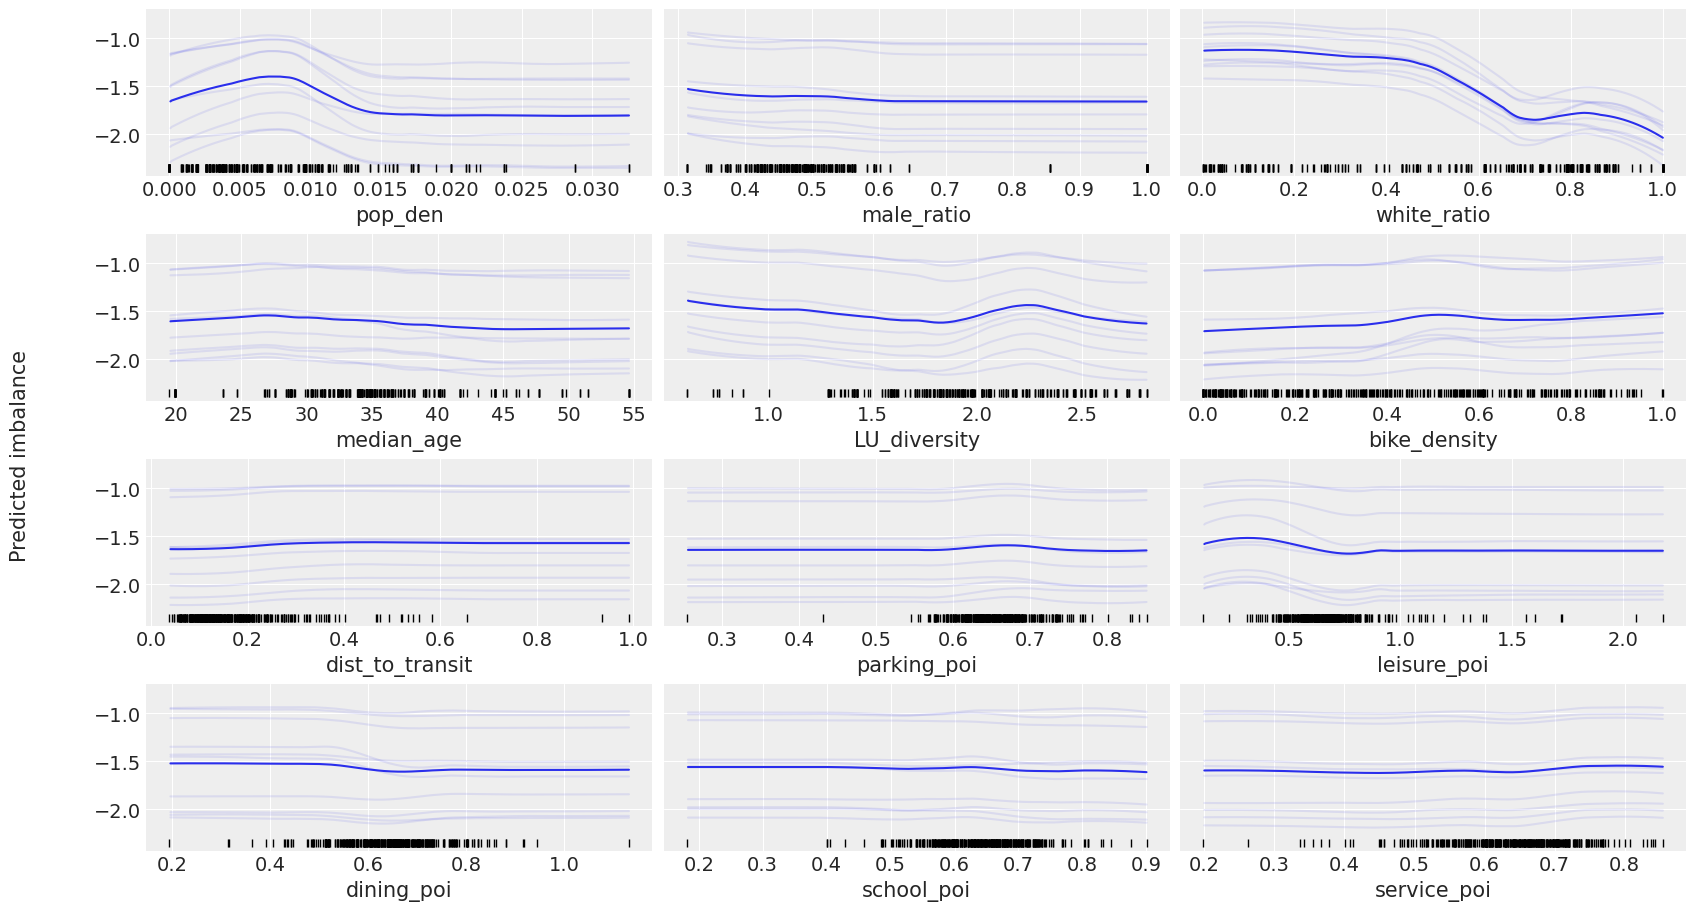

In [82]:
# 5,  4,  6,  3, 14,  1,  9,  2, 17,  10, 19,  7, 11,  8, 12, 15, 16, 20, 13, 18
plt.rc('font', size=8) 
pmb.plot_dependence(μ, X=X, Y=Y, kind='ice', grid=(4,3), figsize=(16,9))

(array([ 2,  4,  0,  5,  1,  3, 10,  8, 11,  9,  7,  6], dtype=int64),
 array([<AxesSubplot:xlabel='covariables', ylabel='importance'>,
        <AxesSubplot:xlabel='number of covariables', ylabel='R²'>],
       dtype=object))

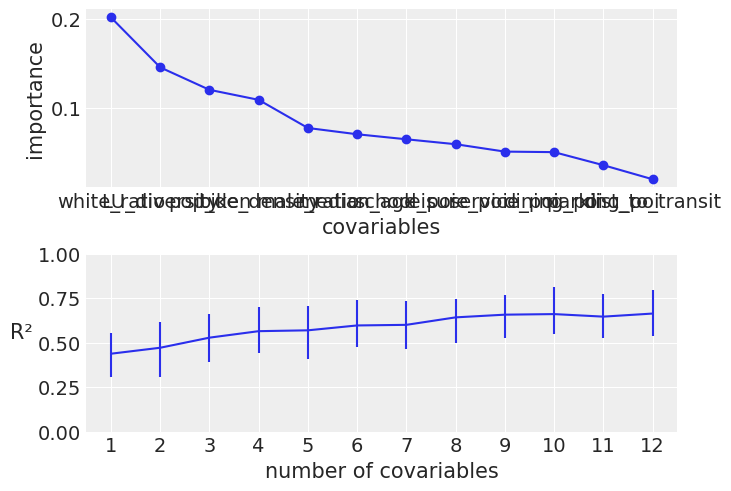

In [83]:
# 'pop_den', 'male_ratio', 'white_ratio', 'median_age', 'LU_diversity', 'bike_density', 'dist_to_transit', 'parking_poi', 'leisure_poi', 'dining_poi', 'school_poi', 'service_poi'
pmb.plot_variable_importance(idata_bikes, μ, X, samples=100)
# 'white_ratio', 'LU_diversity', 'pop_den', 'bike_density', 'male_ratio', 'median_age', 'school_poi', 'leisure_poi', 'service_poi', 'dining_poi', 'parking_poi', 'dist_to_transit'

Feature Ranking:
1. features 10 (0.168478)
2. features 5 (0.165055)
3. features 0 (0.142995)
4. features 2 (0.142930)
5. features 9 (0.061383)
6. features 7 (0.055812)
7. features 1 (0.054940)
8. features 11 (0.051132)
9. features 6 (0.046991)
10. features 3 (0.042781)
11. features 8 (0.039868)
12. features 4 (0.027636)


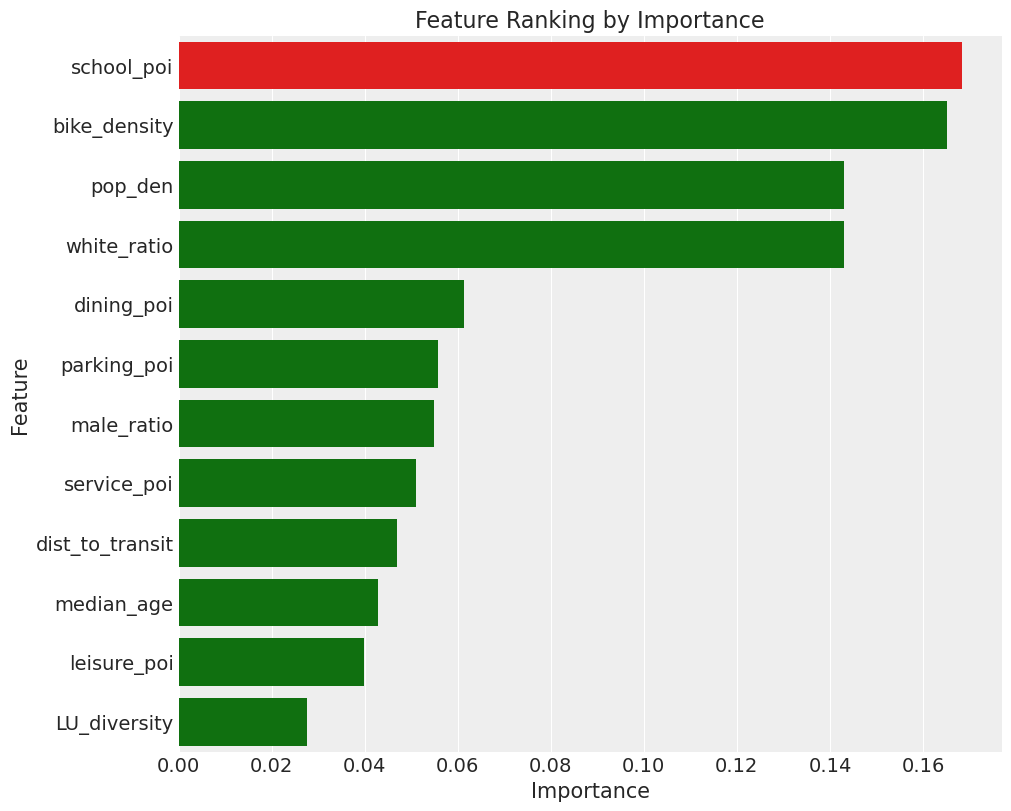

In [84]:
## Random Forest
# Feature selection based on random forest
from sklearn.ensemble import RandomForestRegressor as RRlf 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state=100)

RF_model = RRlf(n_estimators = 100)
RF_model.fit(X_train, y_train)
importances = RF_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF_model.estimators_], axis = 0)

indices = np.argsort(importances)[::-1]

print('Feature Ranking:')
array_feature_RF = []
for f in range(X_train.shape[1]):
    print('%d. features %d (%f)'% (f+1, indices[f], importances[indices[f]]))
    array_feature_RF.append([X_train.columns[indices[f]], importances[indices[f]]])
array_feature_RF = np.array(array_feature_RF)
df_feature_RF = pd.DataFrame({'Feature': array_feature_RF[:, 0],
                             'Importance': array_feature_RF[:, 1]})

values = df_feature_RF.Importance.iloc[0:21]    
idx = df_feature_RF.Feature.iloc[0:21]  
plt.figure(figsize=(10,8))
clrs = ['green' if (x < max(values)) else 'red' for x in values ]
sns.barplot(y = idx, x = values.astype('float'), palette = clrs).set(title = 'Feature Ranking by Importance')
plt.show()

Feature Importances :  [0.08189738 0.05694162 0.20025583 0.07056363 0.05698033 0.20602812
 0.02672401 0.01716864 0.03150934 0.07316635 0.13648532 0.04227932]


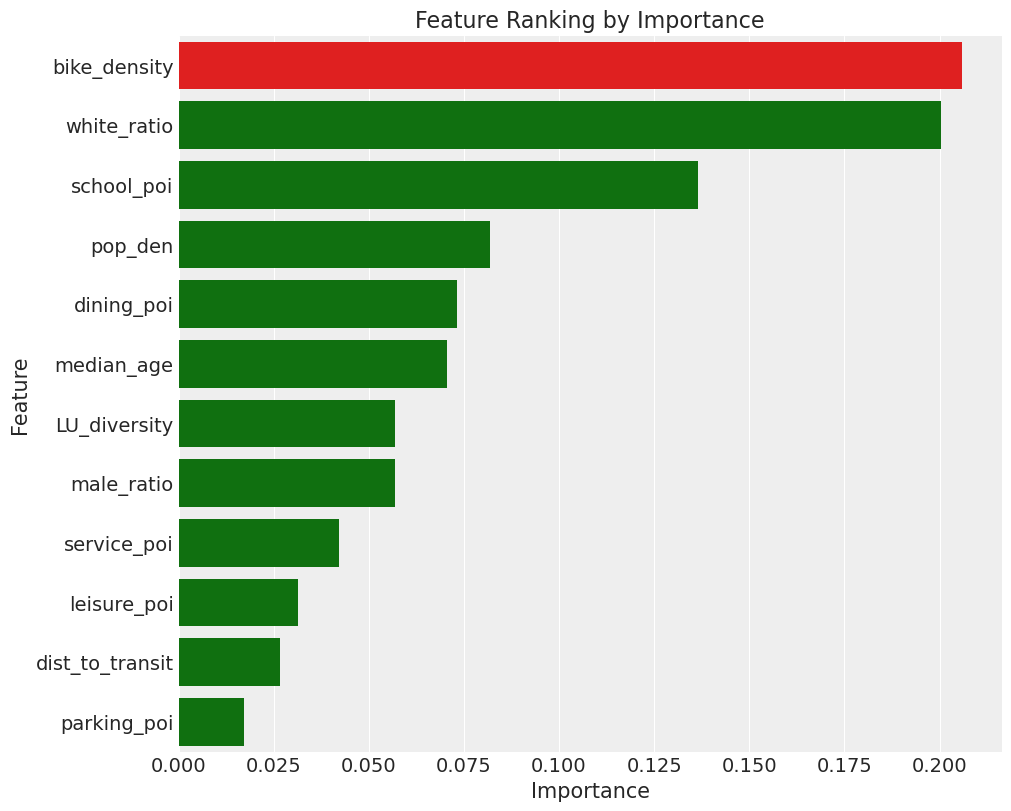

In [85]:
# Feature selection based on XGBoost
from xgboost import XGBRegressor
from xgboost import plot_importance

# fit model to training data
xgb_model = XGBRegressor(random_state = 100)
xgb_model.fit(X_train, y_train)

print("Feature Importances : ", xgb_model.feature_importances_)

'''
# plot feature importance
plot_importance(xgb_model)
plt.show()
'''

xgboost_idx = np.flip(np.argsort(xgb_model.feature_importances_))
xgboost_feature_plot = X_train.columns[xgboost_idx].to_numpy()
xgboost_importance_plot = xgb_model.feature_importances_[xgboost_idx]
df_feature_xgboost = pd.DataFrame({'Feature': xgboost_feature_plot,
                             'Importance': xgboost_importance_plot})

values = df_feature_xgboost.Importance.iloc[0:21]  
idx = df_feature_xgboost.Feature.iloc[0:21]  
plt.figure(figsize=(10,8))
clrs = ['green' if (x < max(values)) else 'red' for x in values ]
sns.barplot(y = idx, x = values.astype('float'), palette = clrs).set(title = 'Feature Ranking by Importance')
plt.show()